In [32]:
import pandas as pd
import numpy as np
import re
import nltk
from pprint import pprint
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
#Reading of .csv file

df = pd.read_csv("TheGuardianDataFinal.csv")
content = df['Text']
assert content.isnull().count() == len(content)

In [4]:
#Conversion Of Date Formatting 
# df = pd.read_csv("TheGuardianDataFinal.csv")

# date = pd.to_datetime(df['Date'])
# print(type(date[0]))

df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%Y-%m-%d')
df["Date"] = pd.to_datetime(df["Date"], format = "%Y/%m/%d")

print(df)
# for i in range(len(df)):
#     print(str(df["Date"][i].year) + "/" + str(df["Date"][i].month))

            Section                                              Title  \
0        Technology  Google Pixel 4 review: a good phone ruined by ...   
1            Cities  Hex in the city: which terrifying town hits Ha...   
2        Technology  Labour calls for halt to Google's acquisition ...   
3        Technology  Google Pixel 4 XL review: not quite ready for ...   
4        Technology  AirPods Pro: Apple launches noise-cancelling e...   
..              ...                                                ...   
196           Money  Why spend £1,000 on a smartphone when you coul...   
197  Life and style  Fluffed it! The truth about Build-A-Bear's day...   
198      Technology  Cracking news: improved smartphone glass twice...   
199         UK news  Man who called for attack on Prince George jai...   
200      Technology  Samsung phones sent photos to random contacts,...   

                                                   URL       Date  \
0    https://www.theguardian.com/technolog

In [5]:
#Word count of each article before removal of stop words

count = [len(content[i]) for i in range(len(content))]
# data['Count Before'] = count
print(count)

[8625, 9258, 2648, 13182, 1899, 7842, 11971, 8772, 5565, 9165, 3198, 2426, 8657, 9182, 12405, 11333, 25352, 7375, 12506, 12845, 3788, 23099, 7351, 7728, 4338, 10207, 11862, 10192, 10773, 5184, 13471, 1028, 6678, 3873, 4470, 10071, 7516, 2964, 3423, 6897, 7321, 6019, 2920, 1614, 1004, 3680, 8942, 6232, 8002, 16608, 7648, 7448, 8712, 8582, 7375, 4079, 8308, 2319, 1882, 7517, 5742, 6646, 638, 7839, 7870, 624, 20102, 10232, 5633, 4097, 3218, 7325, 6543, 3348, 7306, 4280, 9235, 9615, 3016, 1582, 1119, 4117, 6499, 4670, 3604, 10180, 3544, 5768, 9769, 6767, 3352, 828, 5165, 4172, 1195, 1460, 3413, 2723, 7797, 9302, 12164, 5348, 5273, 7782, 3729, 3376, 3347, 4418, 7799, 1798, 6489, 2310, 3982, 9678, 7603, 11839, 720, 5915, 3332, 7701, 5279, 9187, 13448, 5879, 5599, 8929, 2212, 1950, 26567, 3209, 21282, 5188, 4600, 8239, 1318, 4899, 4707, 4045, 7950, 6905, 5694, 4248, 6604, 13625, 5775, 6385, 6005, 7459, 9072, 16628, 8515, 7515, 2805, 11277, 4662, 3423, 9310, 6415, 9101, 7395, 10163, 3749, 6962

In [6]:
#Tokenization and removal of punctuations

data = []
tokenizer = RegexpTokenizer(r'\w+')

content = content.apply(lambda x: tokenizer.tokenize(x))
content.head(20)

0     [Brilliant, camera, slick, features, and, smal...
1     [On, a, dark, dark, night, in, a, dark, dark, ...
2     [Labour, has, written, to, the, competition, r...
3     [Google, s, latest, Pixel, 4, XL, smartphone, ...
4     [Apple, has, launched, a, new, set, of, its, p...
5     [I, use, a, 9, 7in, Samsung, Galaxy, Tab, S2, ...
6     [Always, on, screen, completes, the, package, ...
7     [Still, an, absolute, beast, in, every, way, e...
8     [First, it, was, books, then, it, was, the, Ki...
9     [The, OnePlus, 7T, takes, the, best, bits, of,...
10    [In, a, country, where, the, biggest, companie...
11    [I, think, you, should, at, least, make, an, e...
12    [Plastic, packaging, has, many, amazing, quali...
13    [A, great, camera, screen, and, performance, c...
14    [After, a, period, of, stagnation, the, A, Lea...
15    [Apple, s, iPhone, has, gone, pro, for, its, 1...
16    [Gordon, s, wine, bar, is, reached, through, a...
17    [Microsoft, has, launched, the, Surface, P

In [7]:
#Removal of Stop Words

set(stopwords.words('english'))

def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

content = content.apply(lambda x: remove_stopwords(x))

In [ ]:
#Lemmatization (OLD VERSION)
# lemmatizer = WordNetLemmatizer()

# def word_lemmatizer(text):`
#     lem_text = [lemmatizer.lemmatize(i, pos="v") for i in text]
#     return lem_text

# content = content.apply(lambda x: word_lemmatizer(x))

# content_freq = content

In [8]:
#Lemmatization

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i, pos="a") for i in text]
    lem_text = [lemmatizer.lemmatize(i, pos="s") for i in text]
    lem_text = [lemmatizer.lemmatize(i, pos="v") for i in text]
    lem_text = [lemmatizer.lemmatize(i, pos="r") for i in text]
    lem_text = [lemmatizer.lemmatize(i, pos="n") for i in text]
    return lem_text

content = content.apply(lambda x: word_lemmatizer(x))
print(content[0])
content_freq = content

['Brilliant', 'camera', 'slick', 'feature', 'small', 'size', 'mean', 'nothing', 'phone', 'even', 'last', 'day', 'Google', 'one', 'handful', 'smartphone', 'manufacturer', 'still', 'making', 'flagship', 'phone', 'ginormous', 'beast', 'new', 'Pixel', '4', 'cheapest', 'significantly', 'undercut', 'competition', 'Priced', '669', 'Pixel', '4', '70', 'cheaper', 'last', 'year', 'Pixel', '3', '60', 'cheaper', 'Apple', 'iPhone', '11', 'It', 'also', 'cheaper', 'bigger', 'sibling', '829', 'Pixel', '4', 'XL', 'The', 'concern', 'corner', 'cut', 'matter', 'The', '5', '7in', 'FHD', 'OLED', 'display', '90Hz', 'refresh', 'rate', 'larger', '6', '3in', 'version', 'Pixel', '4', 'XL', 'It', 'look', 'similar', 'good', 'viewing', 'angle', 'inky', 'black', 'bold', 'colour', 'smooth', 'experience', 'thanks', 'high', 'refresh', 'rate', 'But', 'brightest', 'screen', 'available', 'make', 'fine', 'thing', 'quite', 'bright', 'I', 'would', 'like', 'direct', 'sunlight', 'There', 'large', 'forehead', 'containing', 'sen

In [9]:
#Word count of each article after removal of stop words

countaft = [len(content[i]) for i in range(len(content))]
print(countaft)

[944, 951, 241, 1399, 202, 834, 1237, 973, 558, 1007, 331, 255, 853, 1047, 1320, 1240, 2484, 802, 1348, 1366, 406, 2427, 710, 820, 468, 1057, 1288, 1063, 1156, 616, 1389, 112, 664, 383, 476, 1096, 754, 301, 317, 793, 766, 563, 320, 169, 96, 368, 861, 569, 876, 1827, 846, 809, 970, 879, 811, 393, 870, 253, 206, 801, 548, 709, 70, 835, 851, 67, 1956, 1132, 596, 424, 378, 824, 732, 367, 796, 455, 935, 995, 328, 171, 107, 432, 604, 441, 349, 1140, 345, 581, 1004, 723, 347, 78, 545, 449, 131, 148, 365, 298, 885, 919, 1288, 548, 556, 853, 407, 343, 345, 479, 792, 173, 686, 224, 394, 1034, 789, 1170, 82, 637, 341, 797, 579, 913, 1437, 580, 558, 892, 240, 205, 2776, 307, 1985, 545, 483, 807, 137, 494, 480, 426, 818, 731, 616, 428, 705, 1570, 591, 649, 628, 724, 904, 1585, 888, 806, 309, 1235, 550, 329, 1030, 705, 921, 799, 1094, 429, 762, 559, 260, 765, 329, 779, 1047, 343, 862, 960, 1240, 815, 230, 531, 779, 827, 664, 876, 3000, 937, 836, 199, 428, 641, 329, 486, 671, 458, 1089, 136, 220, 416

In [10]:
#Part of Speech tagging

content_tag = [nltk.pos_tag(i) for i in content]
print(content_tag)

[[('Brilliant', 'NNP'), ('camera', 'NN'), ('slick', 'NN'), ('feature', 'NN'), ('small', 'JJ'), ('size', 'NN'), ('mean', 'JJ'), ('nothing', 'NN'), ('phone', 'NN'), ('even', 'RB'), ('last', 'JJ'), ('day', 'NN'), ('Google', 'NNP'), ('one', 'CD'), ('handful', 'NN'), ('smartphone', 'NN'), ('manufacturer', 'NN'), ('still', 'RB'), ('making', 'VBG'), ('flagship', 'NN'), ('phone', 'NN'), ('ginormous', 'JJ'), ('beast', 'VBD'), ('new', 'JJ'), ('Pixel', 'NNP'), ('4', 'CD'), ('cheapest', 'JJS'), ('significantly', 'RB'), ('undercut', 'JJ'), ('competition', 'NN'), ('Priced', 'VBD'), ('669', 'CD'), ('Pixel', 'NNP'), ('4', 'CD'), ('70', 'CD'), ('cheaper', 'JJR'), ('last', 'JJ'), ('year', 'NN'), ('Pixel', 'VBD'), ('3', 'CD'), ('60', 'CD'), ('cheaper', 'JJR'), ('Apple', 'NNP'), ('iPhone', 'NN'), ('11', 'CD'), ('It', 'PRP'), ('also', 'RB'), ('cheaper', 'VBZ'), ('bigger', 'JJR'), ('sibling', 'VBG'), ('829', 'CD'), ('Pixel', 'NNP'), ('4', 'CD'), ('XL', 'VBD'), ('The', 'DT'), ('concern', 'NN'), ('corner', 'N

In [10]:
#Difference of word count before and after stop word removal in percentage, rounded off to 1dp

count_diff = []
for i in range(len(count)):
    count_diff.append(round(((count[i] - countaft[i])/count[i])*100, 1))
print(count_diff)

[89.1, 89.7, 90.9, 89.4, 89.4, 89.4, 89.7, 88.9, 90.0, 89.0, 89.6, 89.5, 90.1, 88.6, 89.4, 89.1, 90.2, 89.1, 89.2, 89.4, 89.3, 89.5, 90.3, 89.4, 89.2, 89.6, 89.1, 89.6, 89.3, 88.1, 89.7, 89.1, 90.1, 90.1, 89.4, 89.1, 90.0, 89.8, 90.7, 88.5, 89.5, 90.6, 89.0, 89.5, 90.4, 90.0, 90.4, 90.9, 89.1, 89.0, 88.9, 89.1, 88.9, 89.8, 89.0, 90.4, 89.5, 89.1, 89.1, 89.3, 90.5, 89.3, 89.0, 89.3, 89.2, 89.3, 90.3, 88.9, 89.4, 89.7, 88.3, 88.8, 88.8, 89.0, 89.1, 89.4, 89.9, 89.7, 89.1, 89.2, 90.4, 89.5, 90.7, 90.6, 90.3, 88.8, 90.3, 89.9, 89.7, 89.3, 89.6, 90.6, 89.4, 89.2, 89.0, 89.9, 89.3, 89.1, 88.6, 90.1, 89.4, 89.8, 89.5, 89.0, 89.1, 89.8, 89.7, 89.2, 89.8, 90.4, 89.4, 90.3, 90.1, 89.3, 89.6, 90.1, 88.6, 89.2, 89.8, 89.7, 89.0, 90.1, 89.3, 90.1, 90.0, 90.0, 89.2, 89.5, 89.6, 90.4, 90.7, 89.5, 89.5, 90.2, 89.6, 89.9, 89.8, 89.5, 89.7, 89.4, 89.2, 89.9, 89.3, 88.5, 89.8, 89.8, 89.5, 90.3, 90.0, 90.5, 89.6, 89.3, 89.0, 89.0, 88.2, 90.4, 88.9, 89.0, 89.9, 89.2, 89.2, 88.6, 89.1, 90.7, 89.8, 89.2, 89.

In [11]:
#Creating a main list of the the total articles with feeling words that contain the feeling words for the respective articles

total_fw = []

for articles in content_tag:
    article_fw = []
    for words in articles:
        #Extracting adjective words only
        if words[1].startswith('JJ'):
            article_fw.append(words)
    total_fw.append(article_fw)

In [12]:
#Mapping of the tags to match the WordNet's POS 

def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

for article in total_fw:
    for words in article:
        penn_to_wn(words[1])

In [13]:
#To get the sentiments based on the dictionary from WordNet that reads the phrases/sentence and returns a numerical value for the positive and -negative sentiments

def get_sentiment(word,tag):
    """ returns list of pos neg and objective score. But returns empty list if not present in senti wordnet. """

    wn_tag = penn_to_wn(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

In [14]:
#Retrieving of sentiments for all the words in each article

net_senti = []
for article in total_fw:
    article_senti = []
    for words in article:
        
        senti = get_sentiment(words[0], words[1])
        if len(senti) > 0:
            print([words[0], (senti[0] - senti[1])])
            article_senti.append([words[0], (senti[0] - senti[1])])
    net_senti.append(article_senti)

['small', -0.375]
['mean', 0.0]
['last', -0.25]
['new', 0.375]
['cheapest', -0.25]
['cheaper', -0.25]
['last', -0.25]
['cheaper', -0.25]
['bigger', 0.125]
['larger', 0.125]
['similar', 0.125]
['good', 0.75]
['inky', 0.0]
['black', -0.375]
['bold', 0.375]
['smooth', 0.25]
['high', -0.125]
['brightest', 0.125]
['available', 0.375]
['fine', 0.375]
['bright', 0.125]
['direct', -0.25]
['large', 0.125]
['new', 0.375]
['black', -0.375]
['similar', 0.125]
['super', 0.625]
['white', -0.25]
['slender', 0.5]
['wide', 0.125]
['lightest', -0.25]
['easiest', 0.375]
['top', 0.0]
['able', 0.125]
['best', 0.75]
['smaller', -0.125]
['available', 0.375]
['wide', 0.125]
['wide', 0.125]
['fluid', 0.0]
['speedy', 0.5]
['poor', -0.75]
['last', -0.25]
['dead', -0.75]
['ambient', 0.375]
['good', 0.75]
['primary', 0.375]
['last', -0.25]
['last', -0.25]
['similar', 0.125]
['last', -0.25]
['least', 0.0]
['heavy', 0.0]
['full', 0.0]
['first', 0.0]
['latest', 0.125]
['complete', 0.0]
['wide', 0.125]
['full', 0.0]
[

['vertical', 0.0]
['wired', 0.0]
['newer', 0.375]
['graphic', 0.0]
['able', 0.125]
['fastest', 0.0]
['available', 0.375]
['different', 0.625]
['available', 0.375]
['available', 0.375]
['new', 0.375]
['black', -0.375]
['available', 0.375]
['limited', 0.0]
['solid', 0.875]
['longer', 0.0]
['last', -0.25]
['primary', 0.375]
['usual', 0.125]
['wireless', 0.0]
['internal', 0.0]
['full', 0.0]
['latest', 0.125]
['first', 0.0]
['standard', 0.0]
['colour', 0.625]
['full', 0.0]
['new', 0.375]
['new', 0.375]
['previous', 0.0]
['biggest', 0.125]
['right', 0.0]
['right', 0.0]
['lower', -0.25]
['third', 0.0]
['vast', -0.125]
['large', 0.125]
['easier', 0.375]
['traditional', 0.0]
['available', 0.375]
['welcome', 0.5]
['least', 0.0]
['monthly', 0.0]
['faster', 0.0]
['excellent', 1.0]
['optical', 0.0]
['standard', 0.0]
['traditional', 0.0]
['capacitive', 0.0]
['main', 0.375]
['ultra', 0.0]
['wide', 0.125]
['primary', 0.375]
['great', 0.0]
['capable', 0.125]
['good', 0.75]
['best', 0.75]
['effective', 

['chubbier', 0.125]
['early', 0.0]
['sandy', 0.0]
['tan', 0.0]
['regular', 0.0]
['Italian', 0.0]
['unlikely', -0.625]
['incident', -0.25]
['facial', 0.0]
['available', 0.375]
['active', -0.125]
['former', -0.125]
['facial', 0.0]
['private', -0.125]
['aggressive', 0.5]
['vanished', 0.0]
['rolled', 0.125]
['least', 0.0]
['high', -0.125]
['close', 0.0]
['mobile', 0.0]
['second', 0.0]
['front', 0.0]
['old', 0.375]
['subject', -0.125]
['front', 0.0]
['facial', 0.0]
['ultimate', -0.125]
['major', 0.625]
['conservative', 0.0]
['Brazilian', 0.0]
['several', -0.5]
['dressed', -0.125]
['potential', -0.25]
['facial', 0.0]
['personal', 0.0]
['worried', -0.875]
['safest', 0.0]
['past', -0.25]
['facial', 0.0]
['private', -0.125]
['personal', 0.0]
['private', -0.125]
['facial', 0.0]
['unknown', -0.25]
['public', -0.125]
['legal', 0.0]
['facial', 0.0]
['enough', 0.125]
['facial', 0.0]
['noticed', 0.125]
['peaceful', 0.25]
['major', 0.625]
['recent', 0.0]
['local', 0.0]
['human', 0.0]
['right', 0.0]
['

['smug', -0.25]
['apathetic', -0.5]
['prepared', 0.625]
['much', 0.0]
['greater', 0.25]
['golden', 0.0]
['future', -0.125]
['enough', 0.125]
['free', 0.375]
['obscene', -0.625]
['ready', 0.0]
['Scottish', 0.0]
['collect', 0.0]
['ready', 0.0]
['middle', 0.0]
['wearable', 0.25]
['new', 0.375]
['smart', 0.5]
['directional', 0.0]
['similar', 0.125]
['smart', 0.5]
['smart', 0.5]
['smart', 0.5]
['akin', 0.0]
['secret', -0.25]
['wide', 0.125]
['true', 0.125]
['active', -0.125]
['similar', 0.125]
['second', 0.0]
['best', 0.75]
['new', 0.375]
['new', 0.375]
['new', 0.375]
['lower', -0.25]
['significant', 0.375]
['smart', 0.5]
['integrated', 0.0]
['standard', 0.0]
['smaller', -0.125]
['cheaper', -0.25]
['smart', 0.5]
['new', 0.375]
['long', 0.0]
['low', -0.25]
['cheaper', -0.25]
['indoor', 0.125]
['improved', 0.375]
['responsible', 0.625]
['last', -0.25]
['false', -0.75]
['potential', -0.25]
['private', -0.125]
['private', -0.125]
['first', 0.0]
['available', 0.375]
['clean', 0.125]
['next', 0.0

['minor', -0.375]
['noticeable', 0.625]
['solid', 0.875]
['momentary', 0.125]
['underground', 0.0]
['weak', -0.375]
['double', 0.25]
['best', 0.75]
['good', 0.75]
['true', 0.125]
['big', 0.125]
['best', 0.75]
['aggressive', 0.5]
['good', 0.75]
['basic', 0.0]
['neutral', 0.125]
['extra', -0.5]
['treble', 0.0]
['best', 0.75]
['left', 0.0]
['neutral', 0.125]
['good', 0.75]
['effective', 0.125]
['new', 0.375]
['top', 0.0]
['full', 0.0]
['maximum', 0.25]
['worth', 0.25]
['active', -0.125]
['ambient', 0.375]
['excellent', 1.0]
['natural', 0.25]
['easy', 0.375]
['good', 0.75]
['clear', 0.5]
['little', -0.375]
['loud', 0.25]
['audible', 0.375]
['fine', 0.375]
['larger', 0.125]
['open', -0.375]
['right', 0.0]
['automatic', 0.0]
['many', 0.0]
['white', -0.25]
['black', -0.375]
['best', 0.75]
['true', 0.125]
['available', 0.375]
['attractive', 0.875]
['small', -0.375]
['light', -0.25]
['best', 0.75]
['pocketable', 0.0]
['good', 0.75]
['shy', 0.0]
['best', 0.75]
['true', 0.125]
['available', 0.375

['new', 0.375]
['superior', 0.625]
['slow', 0.0]
['chief', 0.375]
['powerful', 0.25]
['advanced', -0.25]
['stunning', 0.0]
['new', 0.375]
['direct', -0.25]
['dual', 0.0]
['new', 0.375]
['single', 0.0]
['last', -0.25]
['ultra', 0.0]
['wide', 0.125]
['traditional', 0.0]
['new', 0.375]
['cheaper', -0.25]
['second', 0.0]
['highest', -0.125]
['tougher', -0.75]
['new', 0.375]
['new', 0.375]
['fastest', 0.0]
['capable', 0.125]
['longer', 0.0]
['longest', 0.0]
['firm', 0.25]
['last', -0.25]
['longer', 0.0]
['faster', 0.0]
['facial', 0.0]
['new', 0.375]
['faster', 0.0]
['big', 0.125]
['latest', 0.125]
['new', 0.375]
['mobile', 0.0]
['limited', 0.0]
['many', 0.0]
['major', 0.625]
['significant', 0.375]
['new', 0.375]
['Last', -0.25]
['old', 0.375]
['larger', 0.125]
['cheaper', -0.25]
['top', 0.0]
['fewer', 0.0]
['previous', 0.0]
['straight', -0.375]
['likely', 0.5]
['Chinese', 0.0]
['next', 0.0]
['difficult', -0.75]
['top', 0.0]
['expensive', 0.5]
['cheaper', -0.25]
['last', -0.25]
['worst', -0.

['oval', 0.125]
['circular', 0.25]
['single', 0.0]
['double', 0.25]
['triple', 0.0]
['ambient', 0.375]
['useful', 0.0]
['public', -0.125]
['ambient', 0.375]
['possible', 0.5]
['big', 0.125]
['real', 0.0]
['attractive', 0.875]
['big', 0.125]
['full', 0.0]
['constant', 0.375]
['total', 0.0]
['previous', 0.0]
['true', 0.125]
['new', 0.375]
['high', -0.125]
['correct', 0.625]
['fit', 0.5]
['secure', -0.125]
['heavy', 0.0]
['comfortable', -0.75]
['right', 0.0]
['fleshy', 0.0]
['effective', 0.125]
['large', 0.125]
['lower', -0.25]
['much', 0.0]
['good', 0.75]
['adaptive', 0.25]
['maximum', 0.25]
['best', 0.75]
['great', 0.0]
['expensive', 0.5]
['true', 0.125]
['new', 0.375]
['longtime', 0.0]
['favourite', 0.125]
['great', 0.0]
['high', -0.125]
['treble', 0.0]
['brilliant', 0.875]
['many', 0.0]
['classic', 0.375]
['new', 0.375]
['higher', 0.375]
['solid', 0.875]
['problematic', 0.0]
['mild', 0.0]
['full', 0.0]
['slow', 0.0]
['standard', 0.0]
['difficult', -0.75]
['much', 0.0]
['great', 0.0]
[

['mean', 0.0]
['better', 0.875]
['top', 0.0]
['good', 0.75]
['good', 0.75]
['worth', 0.25]
['top', 0.0]
['fit', 0.5]
['cheaper', -0.25]
['worse', -0.75]
['larger', 0.125]
['worse', -0.75]
['stainless', 0.625]
['luxurious', 0.625]
['best', 0.75]
['red', 0.0]
['cheap', -0.25]
['much', 0.0]
['true', 0.125]
['expensive', 0.5]
['bigger', 0.125]
['pretty', 0.75]
['difficult', -0.75]
['smaller', -0.125]
['better', 0.875]
['smallest', -0.375]
['current', 0.0]
['good', 0.75]
['short', 0.0]
['high', -0.125]
['regular', 0.0]
['optical', 0.0]
['flat', 0.125]
['smaller', -0.125]
['great', 0.0]
['smaller', -0.125]
['lowest', -0.125]
['possible', 0.5]
['bigger', 0.125]
['best', 0.75]
['available', 0.375]
['good', 0.75]
['triple', 0.0]
['rear', 0.0]
['good', 0.75]
['good', 0.75]
['disappointing', -0.75]
['best', 0.75]
['different', 0.625]
['massive', 0.0]
['important', 0.875]
['huge', -0.125]
['big', 0.125]
['attractive', 0.875]
['long', 0.0]
['great', 0.0]
['top', 0.0]
['excellent', 1.0]
['optical', 

['public', -0.125]
['full', 0.0]
['seventh', 0.0]
['newer', 0.375]
['full', 0.0]
['full', 0.0]
['new', 0.375]
['top', 0.0]
['new', 0.375]
['public', -0.125]
['important', 0.875]
['sure', -0.25]
['fixed', 0.0]
['regular', 0.0]
['older', 0.5]
['much', 0.0]
['early', 0.0]
['present', -0.125]
['experienced', 0.5]
['older', 0.5]
['next', 0.0]
['likely', 0.5]
['stable', 0.0]
['complete', 0.0]
['eager', 0.375]
['latest', 0.125]
['largest', 0.125]
['possible', 0.5]
['free', 0.375]
['serial', 0.0]
['serial', 0.0]
['top', 0.0]
['affected', 0.375]
['free', 0.375]
['key', 0.0]
['recent', 0.0]
['quarterly', 0.0]
['financial', 0.25]
['third', 0.0]
['current', 0.0]
['fourth', 0.0]
['traditional', 0.0]
['modern', -0.25]
['electric', 0.125]
['Most', 0.0]
['u', 0.0]
['convenient', 0.375]
['short', 0.0]
['Different', 0.625]
['different', 0.625]
['different', 0.625]
['best', 0.75]
['external', 0.0]
['hard', -0.75]
['first', 0.0]
['best', 0.75]
['second', 0.0]
['sensible', 0.5]
['safe', 0.0]
['third', 0.0]

['human', 0.0]
['weird', -0.75]
['technological', 0.0]
['u', 0.0]
['supernatural', -0.75]
['famous', 0.375]
['identical', -0.375]
['real', 0.0]
['alien', -0.625]
['much', 0.0]
['clear', 0.5]
['similar', 0.125]
['supernatural', -0.75]
['supernatural', -0.75]
['unusual', -0.5]
['wrong', -0.625]
['angry', 0.0]
['much', 0.0]
['disappointing', -0.75]
['frothing', -0.625]
['apoplectic', 0.0]
['famous', 0.375]
['abrasive', -0.375]
['furious', 0.0]
['new', 0.375]
['successful', 0.625]
['sunny', 0.5]
['sweet', 0.0]
['sunny', 0.5]
['stupid', -0.75]
['pleased', 0.625]
['ephemeral', 0.0]
['nuclear', 0.0]
['immense', -0.125]
['global', -0.375]
['best', 0.75]
['big', 0.125]
['successful', 0.625]
['next', 0.0]
['happy', 0.875]
['least', 0.0]
['wanted', 0.625]
['documentary', 0.0]
['different', 0.625]
['Fantastic', 0.375]
['fastest', 0.0]
['good', 0.75]
['massive', 0.0]
['largest', 0.125]
['expensive', 0.5]
['sheer', 0.625]
['expensive', 0.5]
['last', -0.25]
['bigger', 0.125]
['massive', 0.0]
['second

['pocketable', 0.0]
['little', -0.375]
['bigger', 0.125]
['comfortable', -0.75]
['right', 0.0]
['comfortable', -0.75]
['larger', 0.125]
['tiniest', 0.0]
['fine', 0.375]
['extra', -0.5]
['smaller', -0.125]
['great', 0.0]
['proprietary', 0.0]
['scalable', 0.5]
['great', 0.0]
['various', -0.25]
['good', 0.75]
['quiet', -0.5]
['good', 0.75]
['reasonable', 0.5]
['included', 0.0]
['ambient', 0.375]
['sound', 0.75]
['available', 0.375]
['great', 0.0]
['tiny', 0.0]
['second', 0.0]
['extra', -0.5]
['white', -0.25]
['black', -0.375]
['lower', -0.25]
['reputable', 0.875]
['popular', 0.125]
['good', 0.75]
['intensive', 0.375]
['limited', 0.0]
['good', 0.75]
['reasonable', 0.5]
['treble', 0.0]
['traditional', 0.0]
['great', 0.0]
['aware', 0.5]
['last', -0.25]
['small', -0.375]
['friendly', 0.125]
['best', 0.75]
['latest', 0.125]
['second', 0.0]
['extra', -0.5]
['smart', 0.5]
['regular', 0.0]
['first', 0.0]
['numerous', -0.125]
['best', 0.75]
['tiny', 0.0]
['right', 0.0]
['visible', 0.125]
['outside

['existential', 0.0]
['little', -0.375]
['renewed', 0.5]
['Conservative', 0.0]
['many', 0.0]
['legal', 0.0]
['guilty', -0.5]
['lesser', 0.0]
['sexual', 0.25]
['widespread', 0.0]
['anti', -0.375]
['new', 0.375]
['legal', 0.0]
['small', -0.375]
['private', -0.125]
['subject', -0.125]
['scant', -0.125]
['financial', 0.25]
['possible', 0.5]
['contentious', 0.375]
['north', 0.0]
['eastern', 0.0]
['correctional', 0.25]
['unconstitutional', -0.75]
['environmental', 0.0]
['renewable', 0.0]
['violent', 0.125]
['u', 0.0]
['new', 0.375]
['second', 0.0]
['popular', 0.125]
['south', 0.0]
['Asian', 0.0]
['enough', 0.125]
['national', 0.0]
['least', 0.0]
['vast', -0.125]
['many', 0.0]
['foreign', -0.125]
['national', 0.0]
['least', 0.0]
['dead', -0.75]
['second', 0.0]
['radical', 0.0]
['outside', 0.0]
['prime', 0.0]
['national', 0.0]
['meet', 0.625]
['foreign', -0.125]
['international', -0.5]
['red', 0.0]
['tried', 0.625]
['unfortunate', -0.875]
['military', 0.0]
['late', 0.0]
['safe', 0.0]
['British

['dedicated', 0.125]
['single', 0.0]
['double', 0.25]
['accidental', -0.125]
['good', 0.75]
['ultrasonic', 0.375]
['optical', 0.0]
['traditional', 0.0]
['capacitive', 0.0]
['best', 0.75]
['little', -0.375]
['dirty', -0.75]
['best', 0.75]
['traditional', 0.0]
['triple', 0.0]
['main', 0.375]
['hybrid', 0.0]
['best', 0.75]
['main', 0.375]
['dual', 0.0]
['available', 0.375]
['last', -0.25]
['good', 0.75]
['exceptional', 0.125]
['great', 0.0]
['rapid', 0.0]
['good', 0.75]
['best', 0.75]
['low', -0.25]
['light', -0.25]
['impressive', 0.125]
['usable', 0.0]
['effective', 0.125]
['low', -0.25]
['light', -0.25]
['effective', 0.125]
['live', 0.0]
['colour', 0.625]
['shot', 0.0]
['straight', -0.375]
['excellent', 1.0]
['Overall', 0.0]
['best', 0.75]
['short', 0.0]
['fancy', -0.375]
['best', 0.75]
['various', -0.25]
['small', -0.375]
['light', -0.25]
['good', 0.75]
['wireless', 0.0]
['ultrasonic', 0.375]
['incompatible', 0.0]
['compatible', 0.5]
['mobile', 0.0]
['white', -0.25]
['black', -0.375]
[

['North', 0.0]
['first', 0.0]
['South', 0.0]
['Korean', 0.0]
['assistant', 0.0]
['nearby', 0.0]
['certain', -0.375]
['formal', -0.25]
['many', 0.0]
['unwilling', -0.75]
['North', 0.0]
['South', 0.0]
['key', 0.0]
['much', 0.0]
['British', 0.0]
['Korean', 0.0]
['South', 0.0]
['Korean', 0.0]
['social', 0.0]
['North', 0.0]
['Korean', 0.0]
['able', 0.125]
['South', 0.0]
['Korean', 0.0]
['North', 0.0]
['Korean', 0.0]
['North', 0.0]
['economic', 0.0]
['able', 0.125]
['huge', -0.125]
['cultural', 0.0]
['dictatorial', 0.0]
['much', 0.0]
['common', 0.0]
['political', 0.0]
['top', 0.0]
['great', 0.0]
['undeniable', -0.875]
['excellent', 1.0]
['affordable', 0.0]
['last', -0.25]
['cheaper', -0.25]
['top', 0.0]
['front', 0.0]
['wild', 0.0]
['light', -0.25]
['little', -0.375]
['cheap', -0.25]
['small', -0.375]
['small', -0.375]
['massive', 0.0]
['impressive', 0.125]
['little', -0.375]
['full', 0.0]
['good', 0.75]
['bright', 0.125]
['vibrant', 0.625]
['rich', 0.0]
['thick', 0.0]
['wide', 0.125]
['ligh

['smart', 0.5]
['sharp', 0.25]
['native', 0.125]
['big', 0.125]
['smaller', -0.125]
['firm', 0.25]
['big', 0.125]
['unheard', 0.25]
['sound', 0.75]
['confident', 0.375]
['strong', 0.5]
['good', 0.75]
['u', 0.0]
['smaller', -0.125]
['mid', 0.0]
['American', 0.0]
['local', 0.0]
['international', -0.5]
['biggest', 0.125]
['American', 0.0]
['Chinese', 0.0]
['thin', 0.0]
['top', 0.0]
['many', 0.0]
['human', 0.0]
['Much', 0.0]
['unpredictable', -0.625]
['old', 0.375]
['queasy', -0.5]
['fixed', 0.0]
['political', 0.0]
['steady', -0.5]
['busy', 0.375]
['populous', 0.0]
['parliamentary', 0.0]
['new', 0.375]
['right', 0.0]
['bizarre', -0.25]
['double', 0.25]
['populous', 0.0]
['Other', -0.625]
['major', 0.625]
['second', 0.0]
['incumbent', 0.0]
['controversial', 0.5]
['Other', -0.625]
['notable', 0.375]
['first', 0.0]
['Japanese', 0.0]
['last', -0.25]
['known', 0.5]
['larger', 0.125]
['financial', 0.25]
['global', -0.375]
['financial', 0.25]
['authoritarian', 0.0]
['annual', 0.0]
['right', 0.0]


['habitual', 0.375]
['multifarious', 0.25]
['insidious', -0.5]
['toughest', -0.75]
['single', 0.0]
['full', 0.0]
['online', 0.0]
['optimistic', 0.25]
['normal', -0.5]
['natural', 0.25]
['correct', 0.625]
['much', 0.0]
['easy', 0.375]
['early', 0.0]
['bad', -0.625]
['furred', 0.0]
['cautious', 0.75]
['unprecedented', 0.0]
['key', 0.0]
['enough', 0.125]
['physical', 0.0]
['short', 0.0]
['fresh', -0.25]
['blind', 0.0]
['groggy', -0.5]
['usual', 0.125]
['single', 0.0]
['early', 0.0]
['free', 0.375]
['next', 0.0]
['middle', 0.0]
['interesting', 0.375]
['domestic', 0.0]
['slight', -0.375]
['OK', 0.375]
['specific', 0.0]
['whole', 0.125]
['little', -0.375]
['deeper', 0.125]
['frequent', 0.0]
['sixth', 0.0]
['earlier', 0.0]
['abrupt', -0.25]
['absolute', 0.5]
['solid', 0.875]
['happy', 0.875]
['relaxed', -0.625]
['middle', 0.0]
['front', 0.0]
['diminutive', 0.0]
['held', 0.0]
['whole', 0.125]
['several', -0.5]
['second', 0.0]
['ridiculous', -0.625]
['much', 0.0]
['complex', 0.0]
['small', -0.3

['Canadian', 0.0]
['correct', 0.625]
['personal', 0.0]
['patriotic', 0.125]
['clear', 0.5]
['involved', 0.0]
['Australian', 0.0]
['wrong', -0.625]
['negative', -0.875]
['short', 0.0]
['small', -0.375]
['many', 0.0]
['wrong', -0.625]
['live', 0.0]
['main', 0.375]
['biggest', 0.125]
['online', 0.0]
['many', 0.0]
['left', 0.0]
['indoor', 0.125]
['online', 0.0]
['online', 0.0]
['half', 0.0]
['half', 0.0]
['electrical', 0.0]
['huge', -0.125]
['good', 0.75]
['festive', 0.0]
['full', 0.0]
['extra', -0.5]
['black', -0.375]
['online', 0.0]
['hundred', 0.0]
['online', 0.0]
['thousand', 0.0]
['clean', 0.125]
['electric', 0.125]
['wide', 0.125]
['good', 0.75]
['unique', 0.375]
['entire', 0.0]
['long', 0.0]
['best', 0.75]
['clear', 0.5]
['useful', 0.0]
['healthier', 0.5]
['tricky', -0.75]
['perfect', 0.5]
['terrific', 0.0]
['native', 0.125]
['colourful', 0.125]
['daily', 0.0]
['great', 0.0]
['wearable', 0.25]
['massive', 0.0]
['favourite', 0.125]
['useful', 0.0]
['cellular', 0.0]
['wearable', 0.25]

['unable', -0.75]
['improved', 0.375]
['foreign', -0.125]
['migrant', 0.0]
['migrant', 0.0]
['global', -0.375]
['first', 0.0]
['positive', 0.625]
['safe', 0.0]
['good', 0.75]
['basic', 0.0]
['satisfied', 0.375]
['encouraging', 0.5]
['applied', 0.0]
['sure', -0.25]
['responsible', 0.625]
['many', 0.0]
['international', -0.5]
['responsible', 0.625]
['flat', 0.125]
['flat', 0.125]
['different', 0.625]
['vast', -0.125]
['high', -0.125]
['annual', 0.0]
['real', 0.0]
['huge', -0.125]
['fifth', 0.0]
['basic', 0.0]
['minimum', 0.0]
['mobile', 0.0]
['high', -0.125]
['u', 0.0]
['afraid', -0.5]
['punished', -0.5]
['direct', -0.25]
['thorough', 0.75]
['u', 0.0]
['committed', 0.0]
['global', -0.375]
['human', 0.0]
['wanted', 0.625]
['small', -0.375]
['assistant', 0.0]
['official', 0.0]
['brief', 0.0]
['tiny', 0.0]
['everyday', 0.125]
['daily', 0.0]
['enjoyable', 0.25]
['camp', -0.25]
['hard', -0.75]
['whole', 0.125]
['decent', 0.875]
['Good', 0.75]
['top', 0.0]
['high', -0.125]
['troublesome', -0.8

['consolidated', 0.0]
['single', 0.0]
['disappointed', -0.5]
['fine', 0.375]
['best', 0.75]
['possible', 0.5]
['new', 0.375]
['last', -0.25]
['smooth', 0.25]
['excellent', 1.0]
['fantastic', 0.375]
['big', 0.125]
['big', 0.125]
['big', 0.125]
['good', 0.75]
['beat', 0.0]
['smaller', -0.125]
['new', 0.375]
['best', 0.75]
['small', -0.375]
['many', 0.0]
['back', 0.0]
['metal', 0.0]
['luxurious', 0.625]
['etched', 0.0]
['polished', 0.25]
['little', -0.375]
['wide', 0.125]
['small', -0.375]
['beautiful', 0.75]
['last', -0.25]
['best', 0.75]
['close', 0.0]
['massive', 0.0]
['dual', 0.0]
['important', 0.875]
['big', 0.125]
['top', 0.0]
['bigger', 0.125]
['diagonal', 0.0]
['last', -0.25]
['usable', 0.0]
['full', 0.0]
['obvious', 0.5]
['enough', 0.125]
['visible', 0.125]
['right', 0.0]
['fit', 0.5]
['small', -0.375]
['current', 0.0]
['top', 0.0]
['current', 0.0]
['top', 0.0]
['noticeable', 0.625]
['daily', 0.0]
['buttery', -0.25]
['smooth', 0.25]
['top', 0.0]
['aggressive', 0.5]
['rapid', 0.0]

['solo', 0.0]
['several', -0.5]
['effective', 0.125]
['excellent', 1.0]
['dynamic', 0.125]
['first', 0.0]
['superior', 0.625]
['best', 0.75]
['unintentional', -0.125]
['new', 0.375]
['optical', 0.0]
['computational', 0.0]
['satellite', 0.0]
['natural', 0.25]
['human', 0.0]
['simulated', -0.75]
['different', 0.625]
['digital', 0.125]
['optical', 0.0]
['computational', 0.0]
['natural', 0.25]
['main', 0.375]
['separate', -0.5]
['interactive', 0.0]
['contextual', 0.0]
['live', 0.0]
['facial', 0.0]
['first', 0.0]
['mobile', 0.0]
['new', 0.375]
['digital', 0.125]
['smart', 0.5]
['capable', 0.125]
['sunrise', 0.0]
['light', -0.25]
['prior', 0.0]
['available', 0.375]
['colour', 0.625]
['black', -0.375]
['white', -0.25]
['new', 0.375]
['detachable', 0.25]
['full', 0.0]
['last', -0.25]
['high', -0.125]
['high', -0.125]
['similar', 0.125]
['dual', 0.0]
['bottom', 0.0]
['similar', 0.125]
['full', 0.0]
['full', 0.0]
['detachable', 0.25]
['recent', 0.0]
['lower', -0.25]
['new', 0.375]
['smart', 0.5]

['uncapped', 0.0]
['quiet', -0.5]
['overnight', 0.0]
['similar', 0.125]
['professional', 0.0]
['excellent', 1.0]
['good', 0.75]
['smart', 0.5]
['smart', 0.5]
['least', 0.0]
['constant', 0.375]
['front', 0.0]
['excellent', 1.0]
['useful', 0.0]
['alert', 0.5]
['little', -0.375]
['facial', 0.0]
['useful', 0.0]
['regular', 0.0]
['invasive', 0.0]
['biggest', 0.125]
['stringent', -0.25]
['clear', 0.5]
['first', 0.0]
['great', 0.0]
['high', -0.125]
['rich', 0.0]
['smart', 0.5]
['reflex', -0.5]
['long', 0.0]
['born', 0.0]
['sharpest', 0.25]
['big', 0.125]
['spatial', 0.0]
['sound', 0.75]
['decent', 0.875]
['important', 0.875]
['tactical', 0.0]
['advanced', -0.25]
['dead', -0.75]
['good', 0.75]
['fundamental', 0.0]
['sound', 0.75]
['great', 0.0]
['great', 0.0]
['clear', 0.5]
['sure', -0.25]
['good', 0.75]
['great', 0.0]
['clear', 0.5]
['natural', 0.25]
['pro', 0.0]
['reliable', 0.375]
['professional', 0.0]
['good', 0.75]
['high', -0.125]
['great', 0.0]
['upper', 0.125]
['used', 0.0]
['sleek', 0

['ergonomic', 0.0]
['much', 0.0]
['small', -0.375]
['x', 0.0]
['similar', 0.125]
['external', 0.0]
['better', 0.875]
['good', 0.75]
['cheaper', -0.25]
['popular', 0.125]
['older', 0.5]
['graphic', 0.0]
['better', 0.875]
['smaller', -0.125]
['double', 0.25]
['good', 0.75]
['local', 0.0]
['possible', 0.5]
['alternative', 0.125]
['similar', 0.125]
['cheaper', -0.25]
['slower', 0.0]
['eighth', 0.0]
['older', 0.5]
['good', 0.75]
['new', 0.375]
['worth', 0.25]
['good', 0.75]
['old', 0.375]
['slow', 0.0]
['good', 0.75]
['latest', 0.125]
['new', 0.375]
['small', -0.375]
['independent', 0.125]
['commercial', 0.0]
['third', 0.0]
['More', 0.0]
['new', 0.375]
['light', -0.25]
['lit', 0.0]
['self', 0.0]
['human', 0.0]
['steady', -0.5]
['second', 0.0]
['stationary', 0.0]
['stationary', 0.0]
['recognizable', 0.5]
['mechanical', 0.0]
['biological', 0.0]
['fit', 0.5]
['likely', 0.5]
['first', 0.0]
['blank', -0.5]
['second', 0.0]
['special', 0.0]
['last', -0.25]
['second', 0.0]
['clear', 0.5]
['ordinary

['worst', -0.5]
['dead', -0.75]
['problematic', 0.0]
['memorable', 0.125]
['good', 0.75]
['bad', -0.625]
['bad', -0.625]
['viral', 0.0]
['expensive', 0.5]
['last', -0.25]
['limited', 0.0]
['chicken', -0.5]
['special', 0.0]
['last', -0.25]
['unlikely', -0.625]
['chicken', -0.5]
['u', 0.0]
['chicken', -0.5]
['u', 0.0]
['vocational', 0.0]
['chicken', -0.5]
['best', 0.75]
['difficult', -0.75]
['successful', 0.625]
['willing', 0.5]
['difficult', -0.75]
['different', 0.625]
['total', 0.0]
['creative', 0.0]
['better', 0.875]
['nervous', 0.125]
['u', 0.0]
['best', 0.75]
['final', 0.0]
['recent', 0.0]
['inescapable', -0.5]
['chicken', -0.5]
['worth', 0.25]
['regular', 0.0]
['little', -0.375]
['whole', 0.125]
['essential', 0.125]
['dry', -0.25]
['big', 0.125]
['pretty', 0.75]
['decent', 0.875]
['substantial', 0.0]
['defensive', 0.0]
['weird', -0.75]
['mum', 0.0]
['certain', -0.375]
['big', 0.125]
['young', 0.0]
['forgettable', 0.5]
['steady', -0.5]
['dead', -0.75]
['mean', 0.0]
['normal', -0.5]


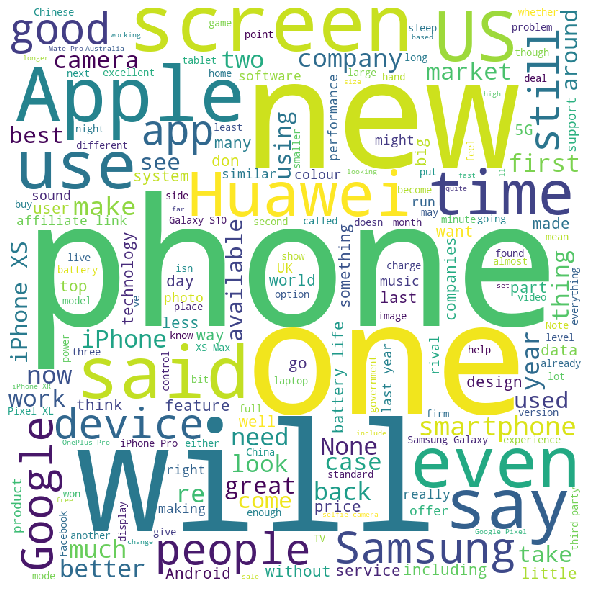

In [54]:
#All the words in the article
article_comment_words = ''

for i in range(len(df['Text'])):
#     print(df['Text'][i])
    article_comment_words = article_comment_words + df['Text'][i] + ' '
# print(len(article_comment_words))

#All the words in the article before NLP

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(article_comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


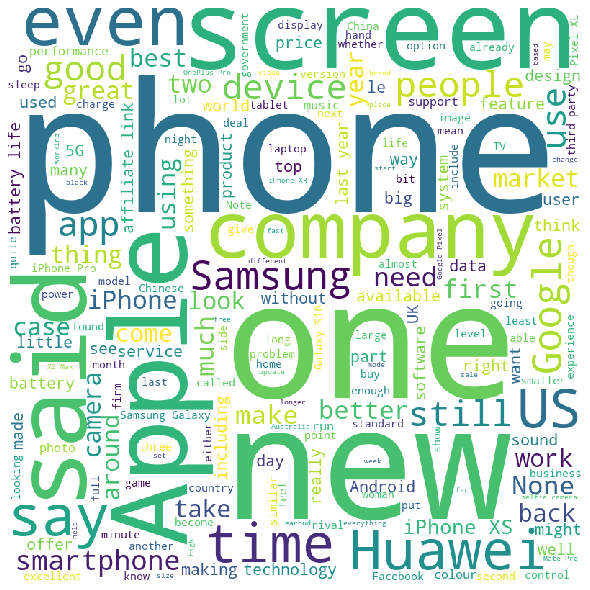

In [55]:
#All the words in the article added into a var
comment_content_words = ''
for i in range(len(content)):
    for values in content[i]:
        comment_content_words = comment_content_words + values + ' '
#         print(values)
# print(len(comment_content_words))

#All the words in the article after NLP

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_content_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

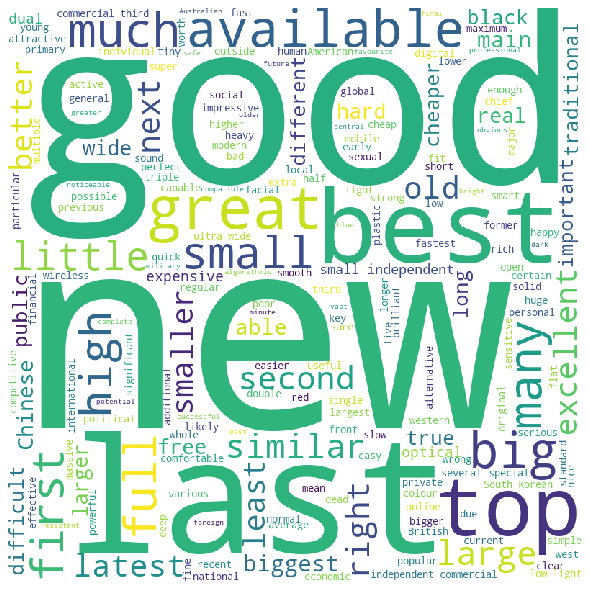

In [56]:
#All the words in the article that are identified as "JJ" added into a var
comment_words = ''
for i in range(len(net_senti)):
    for values in net_senti[i]:
        comment_words = comment_words + values[0] + ' '
# print(len(comment_words))

#Wordcloud based on the feeling words after NLP
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [15]:
#Final printing and to count the number of articles that are positive, negative or neutral based on the sentiment values

article_senti = []
for article in net_senti:
    sentiment = 0
    article_word_count = 0
    for senti in article:
        print(senti[0], senti[1])
        sentiment += senti[1]
        article_word_count += 1
    print("\n********************************************\nTotal Sentiment: ", sentiment)
    print("Word Count In Article: ", article_word_count, "\n********************************************")
    print("\n**********************\n NEXT ARTICLE \n**********************")
    article_senti.append(sentiment)

small -0.375
mean 0.0
last -0.25
new 0.375
cheapest -0.25
cheaper -0.25
last -0.25
cheaper -0.25
bigger 0.125
larger 0.125
similar 0.125
good 0.75
inky 0.0
black -0.375
bold 0.375
smooth 0.25
high -0.125
brightest 0.125
available 0.375
fine 0.375
bright 0.125
direct -0.25
large 0.125
new 0.375
black -0.375
similar 0.125
super 0.625
white -0.25
slender 0.5
wide 0.125
lightest -0.25
easiest 0.375
top 0.0
able 0.125
best 0.75
smaller -0.125
available 0.375
wide 0.125
wide 0.125
fluid 0.0
speedy 0.5
poor -0.75
last -0.25
dead -0.75
ambient 0.375
good 0.75
primary 0.375
last -0.25
last -0.25
similar 0.125
last -0.25
least 0.0
heavy 0.0
full 0.0
first 0.0
latest 0.125
complete 0.0
wide 0.125
full 0.0
least 0.0
new 0.375
natural 0.25
impressive 0.125
larger 0.125
much 0.0
faster 0.0
many 0.0
excellent 1.0
new 0.375
commercial 0.0
ambient 0.375
impressive 0.125
new 0.375
similar 0.125
fine 0.375
straight -0.375
last -0.25
biggest 0.125
third 0.0
tedious -0.25
new 0.375
small -0.375
traditional

super 0.625
minimum 0.0
interesting 0.375
rich 0.0
human 0.0
good 0.75
yellow 0.0
capable 0.125
great 0.0
rich 0.0
good 0.75
clear 0.5
blue 0.0
best 0.75
exact 0.0
best 0.75
improved 0.375
debatable 0.0
rapid 0.0
new 0.375
great 0.0
spectacular 0.25
new 0.375
easier 0.375
latest 0.125
top 0.0
hard -0.75
expandable 0.0
good 0.75
heavy 0.0
gigantic 0.0
gorgeous 0.75
fast 0.0
free 0.375
manageable 0.625
fast 0.0
last -0.25
better 0.875
biggest 0.125
cheaper -0.25
smaller -0.125
easier 0.375
biggest 0.125
best 0.75
fastest 0.0
worth 0.25
bigger 0.125
magic -0.25
ethical 0.0
small -0.375
independent 0.125
commercial 0.0
third 0.0
More 0.0

********************************************
Total Sentiment:  29.375
Word Count In Article:  155 
********************************************

**********************
 NEXT ARTICLE 
**********************
next 0.0
iterative -0.25
western 0.0
visual 0.0
high -0.125
latter 0.0
perfect 0.5
immediate 0.0
deep 0.125
cultural 0.0
cultural 0.0
hard -0.75
ongoin

best 0.75
different 0.625
new 0.375
low -0.25
light -0.25
main 0.375
automatic 0.0
multiple 0.0
second 0.0
available 0.375
light -0.25
second 0.0
dank -0.25
bright 0.125
flat 0.125
dramatic 0.5
last -0.25
good 0.75
deep 0.125
huge -0.125
fine 0.375
first 0.0
full 0.0
large 0.125
past -0.25
fantastic 0.375
best 0.75
third 0.0
useful 0.0
capable 0.125
good 0.75
slow 0.0
big 0.125
big 0.125
first 0.0
important 0.875
last -0.25
stronger 0.5
weakest -0.375
best 0.75
new 0.375
directional 0.0
polished 0.25
easy 0.375
careful 0.5
general 0.0
sensitive 0.0
previous 0.0
black -0.375
green -0.125
last -0.25
top 0.0
best 0.75
smaller -0.125
available 0.375
longer 0.0
excellent 1.0
big 0.125
fine 0.375
low -0.25
digital 0.125
professional 0.0
right 0.0
perfect 0.5
larger 0.125
easy 0.375
biggest 0.125
likely 0.5
large 0.125
good 0.75
unrivalled 0.5
hefty 0.125
premium 0.75
ethical 0.0
small -0.375
independent 0.125
commercial 0.0
third 0.0
More 0.0

********************************************
Tot

true 0.125
last -0.25
long 0.0
pocketable 0.0
cherry 0.0
top 0.0
true 0.125
small -0.375
independent 0.125
commercial 0.0
third 0.0
More 0.0

********************************************
Total Sentiment:  18.75
Word Count In Article:  123 
********************************************

**********************
 NEXT ARTICLE 
**********************
latest 0.125
ongoing 0.0
new 0.375
high -0.125
latest 0.125
western 0.0
open -0.375
mobile 0.0
temporary 0.375
new 0.375
alternative 0.125
Chinese 0.0
essential 0.125
western 0.0
possible 0.5
able 0.125
many 0.0
strong 0.5
new 0.375
good 0.75
multiple 0.0
great 0.0
chief 0.375
huge -0.125
new 0.375
largest 0.125
second 0.0
hard -0.75
biggest 0.125
present -0.125
serious 0.125
main 0.375
strong 0.5
new 0.375
new 0.375
complete 0.0
many 0.0
new 0.375
top 0.0
flexible 0.375
right 0.0
physical 0.0
virtual 0.5
second 0.0
circular 0.25
main 0.375
ultra 0.0
wide 0.125
optical 0.0
capable 0.125
professional 0.0
second 0.0
super 0.625
slow 0.0
new 0.375


national 0.0
latest 0.125
temporary 0.375
American 0.0
open -0.375
available 0.375
technical 0.125
temporary 0.375
temporary 0.375
new 0.375
mean 0.0
unclear 0.25
first 0.0
open -0.375
able 0.125

********************************************
Total Sentiment:  0.625
Word Count In Article:  32 
********************************************

**********************
 NEXT ARTICLE 
**********************
hard -0.75
former -0.125
prime 0.0
curious -0.25
true 0.125
upstairs 0.0
prime 0.0
private -0.125
odd 0.125
favourite 0.125
dead -0.75
favourite 0.125
open -0.375
mawkish 0.125
sentimental 0.5
flat 0.125
unremarkable 0.125
best 0.75
prime 0.0
much 0.0
nearby 0.0
smart 0.5
good 0.75
plural 0.0
many 0.0
whole 0.125
greatest 0.875
prime 0.0
inscribed 0.0
small -0.375
normal -0.5
u 0.0
little -0.375
worth 0.25
tearful -0.5
Chinese 0.0
Chinese 0.0
Chinese 0.0
emotional 0.375
great 0.0
great 0.0
Chinese 0.0
much 0.0

********************************************
Total Sentiment:  0.875
Word Count In

good 0.75
mean 0.0
better 0.875
top 0.0
good 0.75
good 0.75
worth 0.25
top 0.0
fit 0.5
cheaper -0.25
worse -0.75
larger 0.125
worse -0.75
stainless 0.625
luxurious 0.625
best 0.75
red 0.0
cheap -0.25
much 0.0
true 0.125
expensive 0.5
bigger 0.125
pretty 0.75
difficult -0.75
smaller -0.125
better 0.875
smallest -0.375
current 0.0
good 0.75
short 0.0
high -0.125
regular 0.0
optical 0.0
flat 0.125
smaller -0.125
great 0.0
smaller -0.125
lowest -0.125
possible 0.5
bigger 0.125
best 0.75
available 0.375
good 0.75
triple 0.0
rear 0.0
good 0.75
good 0.75
disappointing -0.75
best 0.75
different 0.625
massive 0.0
important 0.875
huge -0.125
big 0.125
attractive 0.875
long 0.0
great 0.0
top 0.0
excellent 1.0
optical 0.0
newer 0.375
optical 0.0
good 0.75
best 0.75
top 0.0
good 0.75
excellent 1.0
great 0.0
great 0.0
wild 0.0
light -0.25
good 0.75
least 0.0
top 0.0
better 0.875
better 0.875
top 0.0
small -0.375
standard 0.0
large 0.125
top 0.0
bigger 0.125
dated -0.375
fantastic 0.375
single 0.0
fa

content 0.0
traditional 0.0
finest 0.375
unprecedented 0.0
new 0.375
easy 0.375
national 0.0
future -0.125
public -0.125
future -0.125

********************************************
Total Sentiment:  5.0
Word Count In Article:  54 
********************************************

**********************
 NEXT ARTICLE 
**********************
easy 0.375
dual 0.0
great 0.0
similar 0.125
pocketable 0.0
several -0.5
expensive 0.5
cheaper -0.25
high -0.125
dominant 0.0
short 0.0
useful 0.0
preferable 0.75
alternative 0.125
Most 0.0
next 0.0
latest 0.125
alternative 0.125
available 0.375
Chinese 0.0
open -0.375
main 0.375
second 0.0
popular 0.125
open -0.375
small -0.375
global -0.375
alternative 0.125
free 0.375
easier 0.375
available 0.375
free 0.375
small -0.375
major 0.625
local 0.0
high -0.125
independent 0.125
unlikely -0.625
smart 0.5
latest 0.125
graphical 0.0
major 0.625
alternative 0.125
current 0.0
true 0.125
main 0.375
general 0.0
much 0.0
various -0.25
new 0.375
viable 0.375
real 0.0


predictable 0.0
conscious -0.125
first 0.0
positive 0.625
second 0.0
colourful 0.125
high -0.125
black -0.375
white -0.25
likely 0.5
solar 0.0
much 0.0
pretend -0.125
high -0.125
squeaky 0.0
jovial 0.625
brilliant 0.875
dark 0.0
u 0.0
u 0.0
first 0.0
sicker -0.625
childish -0.375
sick -0.625
horrid -0.875
creative 0.0
grownup 0.0
light -0.25
jealous 0.125
grateful 0.25
last -0.25
fair 0.625
cinematic 0.0
financial 0.25
past -0.25
tense 0.0
main 0.375
young 0.0
extraordinary 0.625
logistical 0.0
proper 0.75
real 0.0
u 0.0
traditional 0.0
old 0.375
long 0.0
tricky -0.75
musical 0.25
musical 0.25
fair 0.625
new 0.375
fabulous 0.75
different 0.625
long 0.0
long 0.0
bleak -0.5
bleak -0.5
great 0.0
personal 0.0
much 0.0
related 0.0
minute 0.0
next 0.0
current 0.0
social 0.0
social 0.0
frustrated -0.5
entertaining 0.375
intimate 0.75
human 0.0
weird -0.75
technological 0.0
u 0.0
supernatural -0.75
famous 0.375
identical -0.375
real 0.0
alien -0.625
much 0.0
clear 0.5
similar 0.125
supernatura

great 0.0
great 0.0
unique 0.375
premium 0.75
true 0.125
good 0.75
wired 0.0
super 0.625
important 0.875
safe 0.0
expensive 0.5
easy 0.375
good 0.75
compact 0.0
essential 0.125
critical -0.5
poor -0.75
slow 0.0
high -0.125
least 0.0
higher 0.375
likely 0.5
small -0.375
independent 0.125
commercial 0.0
third 0.0
More 0.0

********************************************
Total Sentiment:  21.375
Word Count In Article:  163 
********************************************

**********************
 NEXT ARTICLE 
**********************
silver 0.0
single 0.0
clean 0.125
civil 0.125
antitrust 0.0
massive 0.0
cultural 0.0
personal 0.0
gilded 0.0
big 0.125
untouchable -0.125
empty 0.0
better 0.875
real 0.0
better 0.875
clear 0.5
used 0.0
u 0.0
private -0.125
fine 0.375
second 0.0
real 0.0
personal 0.0
largest 0.125
increased 0.0
uninformed 0.125
negative -0.875
positive 0.625
negative -0.875
positive 0.625
new 0.375
general 0.0
racist -0.375
illegal 0.0
demographic 0.0
preferential -0.125
criminal -0.8

presidential 0.0
female 0.0
right 0.0
biggest 0.125
sexual 0.25
female 0.0
new 0.375
cultural 0.0
new 0.375
sexual 0.25
immune 0.0
psychological -0.375
physical 0.0
new 0.375
young 0.0
strict 0.125
private -0.125
female 0.0
sexual 0.25
prominent 0.125
South 0.0
Korean 0.0
public -0.125
inevitable -0.625
ready 0.0
familiar 0.125
creative 0.0
negative -0.875
deep 0.125
national 0.0
international -0.5
black -0.375
past -0.25
soft -0.25
nuclear 0.0
South 0.0
Korean 0.0
recent 0.0
foreign -0.125
South 0.0
Korean 0.0
clean 0.125
presidential 0.0
thorough 0.75
sexual 0.25
senior 0.375
current 0.0
shameful -0.375
public -0.125
elite 0.375
fair 0.625
official 0.0
obsessive 0.25
young 0.0
moral 0.5
walking 0.5
financial 0.25
top 0.0
senior 0.375
official 0.0
spectacular 0.25
economic 0.0
global -0.375
new 0.375
traditional 0.0
psychological -0.375
acceptable 0.625
top 0.0
sexual 0.25
young 0.0
old 0.375
inexcusable -0.625
global -0.375
international -0.5
unprecedented 0.0
domestic 0.0
social 0.0

official 0.0
double 0.25
unspecified -0.625
urban 0.0
volatile 0.0
political 0.0
firm 0.25
real 0.0
sad -0.625
young 0.0
feudal 0.0
common 0.0
common 0.0
festive 0.0
Asian 0.0
top 0.0
national 0.0
full 0.0
tiny 0.0
several -0.5
public -0.125
former -0.125
civic 0.0
formal -0.25
obvious 0.5
different 0.625
old 0.375
best 0.75
weekly 0.0

********************************************
Total Sentiment:  -1.375
Word Count In Article:  92 
********************************************

**********************
 NEXT ARTICLE 
**********************
single 0.0
cool 0.125
new 0.375
honest 0.375
promotional 0.0
smart 0.5
smart 0.5
stupidest -0.75
modern -0.25
much 0.0
smart 0.5
large 0.125

********************************************
Total Sentiment:  1.5
Word Count In Article:  12 
********************************************

**********************
 NEXT ARTICLE 
**********************
better 0.875
top 0.0
large 0.125
excellent 1.0
available 0.375
different 0.625
top 0.0
difficult -0.75
quick 0.0

next 0.0
original 0.0
last -0.25
original 0.0
available 0.375

********************************************
Total Sentiment:  3.0
Word Count In Article:  28 
********************************************

**********************
 NEXT ARTICLE 
**********************
social 0.0
economic 0.0
big 0.125
chief 0.375
subsequent 0.0
economic 0.0
whole 0.125
first 0.0
usable 0.0
much 0.0
harder -0.75
competitive 0.0
different 0.625
hard -0.75
best 0.75
significant 0.375
different 0.625
tested 0.625
agnostic 0.0
exclusive -0.75
good 0.75
similar 0.125
cheaper -0.25
top 0.0
hard -0.75
west 0.0
alone 0.0
right 0.0
effective 0.125
last -0.25
high -0.125
old 0.375
good 0.75
meaningful 0.125
stiff -0.5
accessory 0.375
smart 0.5
much 0.0
possible 0.5
critical -0.5
current 0.0
main 0.375
rocky -0.125
next 0.0
developed 0.0
direct -0.25
stronger 0.5
major 0.625
many 0.0
good 0.75
High -0.125
chief 0.375
executive 0.0
average 0.0
average 0.0
average 0.0
annual 0.0
free 0.375
small -0.375
foul -0.5
worth 0

least 0.0
Little -0.375
nagging -0.625
tiny 0.0
special 0.0
fluid 0.0
dried -0.375
red 0.0
wide 0.125
open -0.375
faint 0.0
young 0.0
young 0.0
open -0.375
precious 0.375
dark 0.0
tortuous 0.25
difficult -0.75
poor -0.75
mad 0.125
several -0.5
spare 0.25
understanding 0.375
Other -0.625
nervous 0.125
unusual -0.5
social 0.0
specific 0.0
long 0.0
important 0.875
important 0.875
early 0.0
assistant 0.0
secondary -0.75
comprehensive 0.0
distant 0.0
normal -0.5
earnest 0.375
circadian 0.0
digestive 0.0
ancestral 0.0
alternative 0.125
common 0.0
cranial 0.0
next 0.0
new 0.375
responsible 0.625
short 0.0
slight -0.375
brutal -0.625
mental 0.125
female 0.0
key 0.0
postnatal -0.125
electric 0.125
unfit 0.25
manic -0.625
digestive 0.0
stern 0.0
furthest 0.0
urgent 0.0
alternative 0.125
mad 0.125
narrative -0.125
many 0.0
deep 0.125
desperate -0.5
furious 0.0
calm -0.375
national 0.0
possible 0.5
lest 0.0
beautiful 0.75
hard -0.75
little -0.375
big 0.125
younger -0.375
integral 0.0
Venetian 0.0


possible 0.5

********************************************
Total Sentiment:  2.25
Word Count In Article:  43 
********************************************

**********************
 NEXT ARTICLE 
**********************
south 0.0
largest 0.125
second 0.0
largest 0.125
second 0.0
popular 0.125
several -0.5
national 0.0
Chinese 0.0
federal 0.0
national 0.0
mobile 0.0
domestic 0.0
national 0.0
key 0.0
private -0.125
Chinese 0.0
national 0.0
high -0.125
general 0.0
due 0.0
high -0.125
global -0.375
chief 0.375
financial 0.25
many 0.0
least 0.0
Chinese 0.0
human 0.0
Chinese 0.0
stern 0.0
Canadian 0.0
correct 0.625
personal 0.0
patriotic 0.125
clear 0.5
involved 0.0
Australian 0.0
wrong -0.625
negative -0.875
short 0.0
small -0.375
many 0.0
wrong -0.625

********************************************
Total Sentiment:  -1.5
Word Count In Article:  44 
********************************************

**********************
 NEXT ARTICLE 
**********************
live 0.0
main 0.375
biggest 0.125
online 

tried 0.625
central 0.0
live 0.0
natural 0.25
major 0.625
torrential 0.0
next 0.0
innovative 0.5
global -0.375
Russian 0.0
former -0.125
best 0.75
popular 0.125
rigged 0.0
mean 0.0
unwarranted -0.25
classic 0.375
last -0.25
late 0.0
female 0.0
greater 0.25
sure -0.25
generous 0.0
u 0.0
critical -0.5

********************************************
Total Sentiment:  5.375
Word Count In Article:  71 
********************************************

**********************
 NEXT ARTICLE 
**********************
favourite 0.125
complex 0.0
small -0.375
humid 0.25
acrid 0.25
broken -0.125
appalling -0.5
worst -0.5
biggest 0.125
Last -0.25
cheap -0.25
foreign -0.125
migrant 0.0
poorest -0.75
modern -0.25
flagrant -0.875
long 0.0
foreign -0.125
migrant 0.0
biggest 0.125
foreign -0.125
migrant 0.0
deep 0.125
high -0.125
normal -0.5
unable -0.75
improved 0.375
foreign -0.125
migrant 0.0
migrant 0.0
global -0.375
first 0.0
positive 0.625
safe 0.0
good 0.75
basic 0.0
satisfied 0.375
encouraging 0.5
appli

good 0.75
dual 0.0
good 0.75
much 0.0
wider 0.125
closer 0.0
advanced -0.25
identical -0.375
good 0.75
rich 0.0
good 0.75
massive 0.0
older 0.5
available 0.375
excellent 1.0
compatible 0.5
resistant -0.125
worse -0.75
great 0.0
available 0.375
black -0.375
white -0.25
yellow 0.0
coral 0.0
red 0.0
odd 0.125
many 0.0
attractive 0.875
cheaper -0.25
important 0.875
cheap -0.25
top 0.0
much 0.0
good 0.75
great 0.0
luxurious 0.625
larger 0.125
nice 0.875
capable 0.125
best 0.75
last -0.25
best 0.75
big 0.125
correct 0.625
available 0.375
small -0.375
independent 0.125
commercial 0.0
third 0.0
More 0.0

********************************************
Total Sentiment:  15.75
Word Count In Article:  120 
********************************************

**********************
 NEXT ARTICLE 
**********************
latest 0.125
new 0.375
large 0.125
tiny 0.0
fit 0.5
top 0.0
minimum 0.0
dual 0.0
latest 0.125
dual 0.0
rear 0.0
optical 0.0
computational 0.0
colour 0.625
low -0.25
light -0.25
new 0.375
larg

future -0.125
corporate 0.0
artistic 0.0
social 0.0
economic 0.0
likely 0.5
utopian 0.0
first 0.0
many 0.0

********************************************
Total Sentiment:  3.125
Word Count In Article:  110 
********************************************

**********************
 NEXT ARTICLE 
**********************
first 0.0
easier 0.375
side 0.0
second 0.0
good 0.75
flat 0.125
past -0.25
hard -0.75
bad -0.625
faulty 0.5
standard 0.0
flat 0.125
good 0.75
bigger 0.125
high -0.125
keen 0.125
cheap -0.25
bad -0.625
general 0.0
normal -0.5
common 0.0
preferred 0.75
higher 0.375
bright 0.125
dim -0.625
standard 0.0
ultra 0.0
side 0.0
sweet 0.0
Most 0.0
fit 0.5
bigger 0.125
bigger 0.125
easier 0.375
bigger 0.125
fewer 0.0
sharp 0.25
much 0.0
smaller -0.125
small -0.375
bigger 0.125
overall 0.0
larger 0.125
flat 0.125
mean 0.0
many 0.0
popular 0.125
even 0.375
higher 0.375
much 0.0
practical 0.125
main 0.375
unlikely -0.625
old 0.375
better 0.875
free 0.375
important 0.875
enough 0.125
last -0.25

last -0.25
integrated 0.0
old 0.375
snappy -0.25
responsive 0.0
recent 0.0
raw 0.0
new 0.375
primary 0.375
fastest 0.0
full 0.0
optional 0.0
fast 0.0
last -0.25
long 0.0
last -0.25
concentrated 0.0
new 0.375
big 0.125
extra -0.5
routine 0.125
little -0.375
large 0.125
smaller -0.125
split 0.0
new 0.375
useful 0.0
enormous 0.0
large 0.125
fine 0.375
dual 0.0
first 0.0
last -0.25
wide 0.125
effective 0.125
optical 0.0
low -0.25
light -0.25
beat 0.0
closer 0.0
full 0.0
improved 0.375
high -0.125
shot 0.0
shallow -0.125
adjustable 0.125
good 0.75
rich 0.0
good 0.75
better 0.875
previous 0.0
best 0.75
little -0.375
easier 0.375
slippery 0.0
cold -0.75
side 0.0
abnormal -0.75
dual 0.0
symmetrical 0.0
surprising -0.625
black -0.375
big 0.125
expensive 0.5
primary 0.375
enormous 0.0
gorgeous 0.75
useful 0.0
good 0.75
much 0.0
difficult -0.75
heavier 0.0
bigger 0.125
great 0.0
myriad 0.0
smaller -0.125
smaller -0.125
cheaper -0.25
biggest 0.125
best 0.75
big 0.125
best 0.75
big 0.125
small -0.3

least 0.0
huge -0.125
concrete 0.375
nuclear 0.0
progressive 0.625
much 0.0
liberal 0.625
outside 0.0
leading 0.125
joint 0.0
constant 0.375
official 0.0
significant 0.375
53 0.0
North 0.0
Korean 0.0
nuclear 0.0
incremental 0.0
nuclear 0.0
new 0.375
nuclear 0.0
likely 0.5
Korean 0.0
Korean 0.0
possible 0.5
economic 0.0
military 0.0
senior 0.375
American 0.0
dicey -0.375

********************************************
Total Sentiment:  4.375
Word Count In Article:  71 
********************************************

**********************
 NEXT ARTICLE 
**********************
great 0.0
latest 0.125
lower -0.25
top 0.0
last -0.25
top 0.0
big 0.125
second 0.0
outside 0.0
solid 0.875
simple -0.25
best 0.75
full 0.0
big 0.125
narrow 0.0
easy 0.375
large 0.125
thick 0.0
top 0.0
small -0.375
dual 0.0
excellent 1.0
snappy -0.25
fast 0.0
solid 0.875
exceptional 0.125
minute 0.0
similar 0.125
loud 0.25
worse -0.75
average 0.0
primary 0.375
comic 0.5
available 0.375
similar 0.125
hidden -0.375
perman

impossible -0.75
super 0.625
artificial 0.0
first 0.0
teen 0.125
technical 0.125
smart 0.5
simple -0.25
enough 0.125
complex 0.0
general 0.0
enough 0.125
current 0.0
pedestrian -0.125
automated 0.0
poor -0.75
insufficient -0.75
algorithmic 0.0
real 0.0
able 0.125
better 0.875
important 0.875
magic -0.25
incomplete 0.25
large 0.125
complex 0.0
larger 0.125
unpredictable -0.625
new 0.375
golden 0.0
difficult -0.75
possible 0.5
internal 0.0
large 0.125
entire 0.0
human 0.0
intelligent 0.25
long 0.0
proof -0.125
responsible 0.625
foreseeable 0.25
algorithmic 0.0
many 0.0
unexpected -0.25
human 0.0
potential -0.25
easier 0.375
Pharmaceutical 0.0
greater 0.25
social 0.0
small -0.375
military 0.0
consequential 0.125
autonomous 0.0
algorithmic 0.0
robotic 0.0
capable 0.125
various -0.25
able 0.125
algorithmic 0.0
common 0.0
moral 0.5
adaptive 0.25
algorithmic 0.0
everyday 0.125
corporeal 0.0
open -0.375
easy 0.375
military 0.0
new 0.375
mean 0.0
useless -0.5
magical -0.25
big 0.125
magical -0.

demographic 0.0
certain -0.375
young 0.0
black -0.375
successful 0.625
good 0.75
next 0.0
demographic 0.0
much 0.0
new 0.375
international -0.5

********************************************
Total Sentiment:  -1.75
Word Count In Article:  79 
********************************************

**********************
 NEXT ARTICLE 
**********************
larger 0.125
hard -0.75
replaceable 0.5
obvious 0.5
cool 0.125
sleek 0.375
physical 0.0
successful 0.625
white -0.25
fundamental 0.0

********************************************
Total Sentiment:  1.25
Word Count In Article:  10 
********************************************

**********************
 NEXT ARTICLE 
**********************
latest 0.125
lowest -0.125
domestic 0.0
new 0.375
lowest -0.125
high -0.125
global -0.375
recent 0.0
unlikely -0.625
easier 0.375
recent 0.0
biggest 0.125
huge -0.125
suspect -0.5
next 0.0
low -0.25
late 0.0
latest 0.125
positive 0.625
low -0.25
unlikely -0.625
small -0.375
recent 0.0
much 0.0
larger 0.125
weak -

In [23]:
pos_art = 0
neg_art = 0
sentiment = []

for senti in article_senti:
    if senti > 0:
        pos_art += 1
        sentiment.append("Positive")
    elif senti < 0:
        neg_art += 1
        sentiment.append("Negative")
    else:
        sentiment.append("Neutral")
print("Out Of {} Articles, {} Are Positive , {} Are Negative And {} Is/Are Neutral"
      .format(len(article_senti), pos_art, neg_art, (len(article_senti) - pos_art - neg_art)))
print(sentiment)

Out Of 201 Articles, 168 Are Positive , 32 Are Negative And 1 Is/Are Neutral
['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive'

In [27]:
df['Sentiment'] = article_senti
df['Final Sentiment'] = sentiment

In [26]:
df.to_csv("Formatted_Data_Sentiment.csv", index = False)